In [1]:
import scanpy as sc
import time
from pyROMA.ROMA import *
import os
import pandas as pd
import anndata
print(os.getcwd())
print(ROMA)

/home/az/Projects/01_Curie/05_pyROMA/pyROMA_shared
<class 'pyROMA.ROMA.ROMA'>


# There's additional centering in Truncated SVD

In [2]:
# Initialize ROMA
roma = ROMA()
# this should be empty at first
roma.adata

In [3]:
roma

scROMA

In [4]:
df = pd.read_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/pbulk_matrix_Rade2024_normalized.csv',index_col=0)
print(df.shape)
df.head()

(36602, 177)


,MXMERZ002A_02_clusterCD4 T-Cell,MXMERZ002A_02_clusterCD8 T-Cell,MXMERZ002A_02_clustercDC,MXMERZ002A_02_clusterMono CD14,MXMERZ002A_02_clusterMono CD16,MXMERZ002A_02_clusterNK,MXMERZ002A_02_clusterpDC,MXMERZ002A_02_clusterPlasma cell,MXMERZ002A_02_clusterProgenitor,MXMERZ002A_03_clusterB-Cell,...,MXMERZ002A_24_clusterPlasma cell,MXMERZ002A_24_clusterProgenitor,MXMERZ002A_25_clusterB-Cell,MXMERZ002A_25_clusterCD4 T-Cell,MXMERZ002A_25_clusterCD8 T-Cell,MXMERZ002A_25_clustercDC,MXMERZ002A_25_clusterMono CD14,MXMERZ002A_25_clusterMono CD16,MXMERZ002A_25_clusterNK,MXMERZ002A_25_clusterpDC
CAR-BCMA,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,...,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156
MIR1302-2HG,-0.734156,-0.734156,-0.734156,-0.052713,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,...,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156
FAM138A,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,...,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156
OR4F5,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,...,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156
AL627309.1,-0.734156,-0.734156,-0.734156,-0.052713,-0.734156,-0.734156,-0.734156,-0.230462,-0.734156,0.829174,...,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,-0.734156,2.151458,-0.734156,-0.734156,-0.734156


In [5]:
adata = anndata.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 177 × 36602

In [6]:
# Genes are in the var
adata.var

""
CAR-BCMA
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [7]:
roma.adata = adata
print(roma.adata)

AnnData object with n_obs × n_vars = 177 × 36602


In [8]:
os.chdir('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/')
roma.gmt ='h.all.v2023.2.Hs.symbols.gmt'
# This function allows to load the patwhays into dictionary
pathways = roma.read_gmt_to_dict('h.all.v2023.2.Hs.symbols.gmt')

In [9]:
pathways_to_check = 'all'

In [10]:
roma

scROMA

In [11]:
# Filter pathways that have less genes than min_n_number
roma.min_n_genes

10

In [13]:
# Set the number of iterations to create the null distribution
iters = 1000

In [14]:
# Granularity of the null geneset size, from 0 to 100, less is more precise
roma.approx_int = 1

In [15]:
start = time.time()
# run it without outlier detection
roma.compute(pathways_to_check, parallel=True, incremental=False, iters=iters, loocv_on=False)
end = time.time()
minutes, seconds = divmod(end - start, 60)
print(f"Truncated Parallel {iters} iterations, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))

adata

Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  32 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  36 
Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  36 
Took null distribution from previous calculation
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  40 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  42 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  44 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  49 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  54 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  74 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  87 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  96 
Processing gene set: HALLMARK_INTERFE

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

In [16]:
roma

scROMA: module activities are computed

In [17]:
roma.adata

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

In [18]:
roma.adata.uns['ROMA_stats']

,L1,p_value,Median_Exp,q_value
HALLMARK_NOTCH_SIGNALING,0.186629,1.0,11.819381,0.001350
HALLMARK_ANGIOGENESIS,0.290031,1.0,1.266260,0.358732
HALLMARK_HEDGEHOG_SIGNALING,0.293254,1.0,0.043069,0.969031
HALLMARK_PANCREAS_BETA_CELLS,0.413767,1.0,0.000374,0.969031
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.164614,1.0,8.963286,0.002562
HALLMARK_APICAL_SURFACE,0.408088,1.0,0.008099,0.969031
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,0.034273,1.0,15.332253,0.001350
HALLMARK_TGF_BETA_SIGNALING,0.114584,1.0,14.891314,0.001350
HALLMARK_MYC_TARGETS_V2,0.040981,1.0,14.817070,0.001350
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.108790,1.0,11.401592,0.001350


In [19]:
type(roma.adata)

anndata._core.anndata.AnnData

In [20]:
type(adata.uns['ROMA'])

dict

In [21]:
type(adata.uns['ROMA_stats'])

pandas.core.frame.DataFrame

In [22]:
def save_ROMA_results(adata, path):
    # saves the adata to a path
    import pickle 
    d = adata.uns['ROMA']

    with open(f'{path}.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

    del adata.uns['ROMA']
    adata.write(f"{path}.h5ad")

    return

def load_ROMA_results(path):
    # loads the results into adata
    import pickle
    import scanpy as sc 

    with open(f'{path}.pickle', 'rb') as handle:
        d = pickle.load(handle)

    adata = sc.read_h5ad(f'{path}.h5ad')
    adata.uns['ROMA'] = d

    return adata

In [23]:
adata_backup = roma.adata.copy()

In [24]:
path_to_save = '/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/pyroma_outputs/RadeData_nooutliers_centering'
save_ROMA_results(adata=roma.adata, path=path_to_save)

In [25]:
del roma.adata

In [26]:
roma.adata

AttributeError: 'ROMA' object has no attribute 'adata'

In [27]:
roma.adata = load_ROMA_results(path_to_save)

In [28]:
roma.adata

AnnData object with n_obs × n_vars = 177 × 36602
    uns: 'ROMA_active_modules', 'ROMA_stats', 'ROMA'

In [29]:
roma.adata.uns['ROMA_stats'].to_csv('pyroma_outputs/ROMA_stats_nooutliers_centering.csv')

# Compare rROMA and pyROMA

In [30]:
rROMA_df = pd.read_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_module_matrix.csv', index_col=[0])
rROMA_df.head()

,L1,Median L1,ppv L1,L1/L2,Median L1/L2,ppv L1/L2,Median Exp,ppv Median Exp,q L1,q L1/L2,q Median Exp
HALLMARK_ADIPOGENESIS,0.129883,0.198628,1.00,0.974184,1.425571,1.00,9.257435,0.00,1.000000,1.000000,0.000000
HALLMARK_ALLOGRAFT_REJECTION,0.390254,0.198628,0.00,4.241984,1.425571,0.00,-0.769921,0.98,0.000000,0.000000,0.990625
HALLMARK_ANDROGEN_RESPONSE,0.115085,0.211010,1.00,1.017066,1.449478,1.00,-6.831589,0.00,1.000000,1.000000,0.000000
HALLMARK_ANGIOGENESIS,0.296008,0.260650,0.24,1.338702,1.640605,0.76,-0.154860,0.96,0.666667,1.000000,0.990625
HALLMARK_APICAL_JUNCTION,0.234288,0.198628,0.01,1.688134,1.425571,0.22,-0.423093,0.99,0.041667,0.676471,0.990625


In [31]:
pyroma = roma.adata.uns['ROMA_stats'].copy()
pyroma.head()

,L1,p_value,Median_Exp,q_value
HALLMARK_NOTCH_SIGNALING,0.186629,1.0,11.819381,0.001350
HALLMARK_ANGIOGENESIS,0.290031,1.0,1.266260,0.358732
HALLMARK_HEDGEHOG_SIGNALING,0.293254,1.0,0.043069,0.969031
HALLMARK_PANCREAS_BETA_CELLS,0.413767,1.0,0.000374,0.969031
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.164614,1.0,8.963286,0.002562


In [32]:
# Extract Median Exp L1

In [33]:
rROMA_df.shape

(50, 11)

In [34]:
pyroma.shape

(50, 4)

In [35]:
merged_df = pd.merge(rROMA_df, pyroma, left_index=True, right_index=True, suffixes=('_R', '_py'))
merged_df.head()

,L1_R,Median L1,ppv L1,L1/L2,Median L1/L2,ppv L1/L2,Median Exp,ppv Median Exp,q L1,q L1/L2,q Median Exp,L1_py,p_value,Median_Exp,q_value
HALLMARK_ADIPOGENESIS,0.129883,0.198628,1.00,0.974184,1.425571,1.00,9.257435,0.00,1.000000,1.000000,0.000000,0.117529,1.0,13.928635,0.001350
HALLMARK_ALLOGRAFT_REJECTION,0.390254,0.198628,0.00,4.241984,1.425571,0.00,-0.769921,0.98,0.000000,0.000000,0.990625,0.373699,1.0,2.297314,0.008741
HALLMARK_ANDROGEN_RESPONSE,0.115085,0.211010,1.00,1.017066,1.449478,1.00,-6.831589,0.00,1.000000,1.000000,0.000000,0.093545,1.0,11.481135,0.001350
HALLMARK_ANGIOGENESIS,0.296008,0.260650,0.24,1.338702,1.640605,0.76,-0.154860,0.96,0.666667,1.000000,0.990625,0.290031,1.0,1.266260,0.358732
HALLMARK_APICAL_JUNCTION,0.234288,0.198628,0.01,1.688134,1.425571,0.22,-0.423093,0.99,0.041667,0.676471,0.990625,0.198728,1.0,3.959318,0.001350


In [36]:
merged_df.shape

(50, 15)

In [37]:
merged_df[['L1_R', 'L1_py', 'ppv L1','p_value', 'Median Exp', 'Median_Exp','q Median Exp', 'q_value' ]]

,L1_R,L1_py,ppv L1,p_value,Median Exp,Median_Exp,q Median Exp,q_value
HALLMARK_ADIPOGENESIS,0.129883,0.117529,1.00,1.0,9.257435,13.928635,0.000000,0.001350
HALLMARK_ALLOGRAFT_REJECTION,0.390254,0.373699,0.00,1.0,-0.769921,2.297314,0.990625,0.008741
HALLMARK_ANDROGEN_RESPONSE,0.115085,0.093545,1.00,1.0,-6.831589,11.481135,0.000000,0.001350
HALLMARK_ANGIOGENESIS,0.296008,0.290031,0.24,1.0,-0.154860,1.266260,0.990625,0.358732
HALLMARK_APICAL_JUNCTION,0.234288,0.198728,0.01,1.0,-0.423093,3.959318,0.990625,0.001350
HALLMARK_APICAL_SURFACE,0.410351,0.408088,0.00,1.0,-0.191439,0.008099,0.990625,0.969031
HALLMARK_APOPTOSIS,0.212387,0.108954,0.24,1.0,3.690577,11.982309,0.546713,0.001350
HALLMARK_BILE_ACID_METABOLISM,0.209202,0.118170,0.46,1.0,0.318406,9.176568,0.990625,0.001350
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.156816,0.108790,0.99,1.0,-5.151147,11.401592,0.000000,0.001350
HALLMARK_COAGULATION,0.262133,0.249742,0.01,1.0,-0.600306,2.036158,0.990625,0.058081


In [38]:
merged_df = pd.merge(rROMA_df, pyroma, left_index=True, right_index=True, suffixes=('_R', '_py'))
merged_df.head()

,L1_R,Median L1,ppv L1,L1/L2,Median L1/L2,ppv L1/L2,Median Exp,ppv Median Exp,q L1,q L1/L2,q Median Exp,L1_py,p_value,Median_Exp,q_value
HALLMARK_ADIPOGENESIS,0.129883,0.198628,1.00,0.974184,1.425571,1.00,9.257435,0.00,1.000000,1.000000,0.000000,0.117529,1.0,13.928635,0.001350
HALLMARK_ALLOGRAFT_REJECTION,0.390254,0.198628,0.00,4.241984,1.425571,0.00,-0.769921,0.98,0.000000,0.000000,0.990625,0.373699,1.0,2.297314,0.008741
HALLMARK_ANDROGEN_RESPONSE,0.115085,0.211010,1.00,1.017066,1.449478,1.00,-6.831589,0.00,1.000000,1.000000,0.000000,0.093545,1.0,11.481135,0.001350
HALLMARK_ANGIOGENESIS,0.296008,0.260650,0.24,1.338702,1.640605,0.76,-0.154860,0.96,0.666667,1.000000,0.990625,0.290031,1.0,1.266260,0.358732
HALLMARK_APICAL_JUNCTION,0.234288,0.198628,0.01,1.688134,1.425571,0.22,-0.423093,0.99,0.041667,0.676471,0.990625,0.198728,1.0,3.959318,0.001350


In [39]:
merged_df.shape

(50, 15)

In [40]:
new_merge = merged_df[['L1_R', 'L1_py', 'ppv L1','p_value', 'Median Exp', 'Median_Exp','q Median Exp', 'q_value' ]]
new_merge = new_merge.rename(columns={'ppv L1':'ppv L1_R',
                 'p_value':'p_value_py',
                  'Median Exp':'Median Exp_R',
                  'Median_Exp':'Median_Exp_py',
                  'q Median Exp':'q Median Exp_R',
                  'q_value':'q_value_py'})
new_merge.head()

,L1_R,L1_py,ppv L1_R,p_value_py,Median Exp_R,Median_Exp_py,q Median Exp_R,q_value_py
HALLMARK_ADIPOGENESIS,0.129883,0.117529,1.00,1.0,9.257435,13.928635,0.000000,0.001350
HALLMARK_ALLOGRAFT_REJECTION,0.390254,0.373699,0.00,1.0,-0.769921,2.297314,0.990625,0.008741
HALLMARK_ANDROGEN_RESPONSE,0.115085,0.093545,1.00,1.0,-6.831589,11.481135,0.000000,0.001350
HALLMARK_ANGIOGENESIS,0.296008,0.290031,0.24,1.0,-0.154860,1.266260,0.990625,0.358732
HALLMARK_APICAL_JUNCTION,0.234288,0.198728,0.01,1.0,-0.423093,3.959318,0.990625,0.001350


In [41]:
new_merge.to_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_pyroma_rroma_nooutliers_centering.csv')

In [42]:

new_merge

,L1_R,L1_py,ppv L1_R,p_value_py,Median Exp_R,Median_Exp_py,q Median Exp_R,q_value_py
HALLMARK_ADIPOGENESIS,0.129883,0.117529,1.00,1.0,9.257435,13.928635,0.000000,0.001350
HALLMARK_ALLOGRAFT_REJECTION,0.390254,0.373699,0.00,1.0,-0.769921,2.297314,0.990625,0.008741
HALLMARK_ANDROGEN_RESPONSE,0.115085,0.093545,1.00,1.0,-6.831589,11.481135,0.000000,0.001350
HALLMARK_ANGIOGENESIS,0.296008,0.290031,0.24,1.0,-0.154860,1.266260,0.990625,0.358732
HALLMARK_APICAL_JUNCTION,0.234288,0.198728,0.01,1.0,-0.423093,3.959318,0.990625,0.001350
HALLMARK_APICAL_SURFACE,0.410351,0.408088,0.00,1.0,-0.191439,0.008099,0.990625,0.969031
HALLMARK_APOPTOSIS,0.212387,0.108954,0.24,1.0,3.690577,11.982309,0.546713,0.001350
HALLMARK_BILE_ACID_METABOLISM,0.209202,0.118170,0.46,1.0,0.318406,9.176568,0.990625,0.001350
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.156816,0.108790,0.99,1.0,-5.151147,11.401592,0.000000,0.001350
HALLMARK_COAGULATION,0.262133,0.249742,0.01,1.0,-0.600306,2.036158,0.990625,0.058081


In [43]:
difference_df = pd.DataFrame(np.absolute(new_merge['L1_R'] - new_merge['L1_py']))
difference_df.columns = ['L1 R-py']
difference_df.head()

,L1 R-py
HALLMARK_ADIPOGENESIS,0.012354
HALLMARK_ALLOGRAFT_REJECTION,0.016555
HALLMARK_ANDROGEN_RESPONSE,0.021540
HALLMARK_ANGIOGENESIS,0.005977
HALLMARK_APICAL_JUNCTION,0.035560


In [44]:
difference_df.mean()

L1 R-py    0.030759
dtype: float64

In [45]:
difference_df['Median Exp R-py'] = np.absolute(new_merge['Median Exp_R'] - new_merge['Median_Exp_py'])
difference_df.head()

,L1 R-py,Median Exp R-py
HALLMARK_ADIPOGENESIS,0.012354,4.671200
HALLMARK_ALLOGRAFT_REJECTION,0.016555,3.067235
HALLMARK_ANDROGEN_RESPONSE,0.021540,18.312724
HALLMARK_ANGIOGENESIS,0.005977,1.421120
HALLMARK_APICAL_JUNCTION,0.035560,4.382410


In [46]:
difference_df.mean()

L1 R-py            0.030759
Median Exp R-py    8.042897
dtype: float64

In [47]:
# adjusted p_values for L1 (in R = q L1, in py = p_value)
difference_df['p_value L1 R-py'] = np.absolute(merged_df['q L1'] - new_merge['p_value_py'] )
difference_df['q_value Med Exp R-py'] = np.absolute(new_merge['q Median Exp_R'] - new_merge['q_value_py'])

difference_df.head()

,L1 R-py,Median Exp R-py,p_value L1 R-py,q_value Med Exp R-py
HALLMARK_ADIPOGENESIS,0.012354,4.671200,0.000000,0.001350
HALLMARK_ALLOGRAFT_REJECTION,0.016555,3.067235,1.000000,0.981884
HALLMARK_ANDROGEN_RESPONSE,0.021540,18.312724,0.000000,0.001350
HALLMARK_ANGIOGENESIS,0.005977,1.421120,0.333333,0.631893
HALLMARK_APICAL_JUNCTION,0.035560,4.382410,0.958333,0.989275


In [48]:
difference_df.mean()

L1 R-py                 0.030759
Median Exp R-py         8.042897
p_value L1 R-py         0.297950
q_value Med Exp R-py    0.314170
dtype: float64

In [49]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10)

,L1 R-py,Median Exp R-py,p_value L1 R-py,q_value Med Exp R-py
HALLMARK_IL2_STAT5_SIGNALING,0.149880,10.285530,1.000000,0.998650
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.129343,8.883907,0.333333,0.988063
HALLMARK_APOPTOSIS,0.103433,8.291732,0.333333,0.545363
HALLMARK_BILE_ACID_METABOLISM,0.091033,8.858162,0.000000,0.989275
HALLMARK_COMPLEMENT,0.087229,14.175366,1.000000,0.618806
HALLMARK_HEME_METABOLISM,0.065582,8.500638,0.000000,0.904129
HALLMARK_IL6_JAK_STAT3_SIGNALING,0.053120,4.746630,0.730769,0.001350
HALLMARK_P53_PATHWAY,0.051947,6.639996,0.000000,0.001350
HALLMARK_INFLAMMATORY_RESPONSE,0.050004,3.815863,1.000000,0.001350
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.048027,16.552739,0.000000,0.001350


In [50]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()

['HALLMARK_IL2_STAT5_SIGNALING',
 'HALLMARK_WNT_BETA_CATENIN_SIGNALING',
 'HALLMARK_APOPTOSIS',
 'HALLMARK_BILE_ACID_METABOLISM',
 'HALLMARK_COMPLEMENT',
 'HALLMARK_HEME_METABOLISM',
 'HALLMARK_IL6_JAK_STAT3_SIGNALING',
 'HALLMARK_P53_PATHWAY',
 'HALLMARK_INFLAMMATORY_RESPONSE',
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS']

In [51]:
non_adj_ps = {}
for k,v in roma.adata.uns['ROMA'].items():
    non_adj_ps[k] = v.non_adj_p
non_adj_ps = pd.Series(non_adj_ps)
non_adj_ps

HALLMARK_NOTCH_SIGNALING                      1.000000
HALLMARK_ANGIOGENESIS                         0.666667
HALLMARK_HEDGEHOG_SIGNALING                   0.666667
HALLMARK_PANCREAS_BETA_CELLS                  0.333333
HALLMARK_WNT_BETA_CATENIN_SIGNALING           1.000000
HALLMARK_APICAL_SURFACE                       0.333333
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY      1.000000
HALLMARK_TGF_BETA_SIGNALING                   1.000000
HALLMARK_MYC_TARGETS_V2                       1.000000
HALLMARK_CHOLESTEROL_HOMEOSTASIS              1.000000
HALLMARK_IL6_JAK_STAT3_SIGNALING              0.333333
HALLMARK_PROTEIN_SECRETION                    1.000000
HALLMARK_INTERFERON_ALPHA_RESPONSE            1.000000
HALLMARK_ANDROGEN_RESPONSE                    1.000000
HALLMARK_PEROXISOME                           1.000000
HALLMARK_PI3K_AKT_MTOR_SIGNALING              1.000000
HALLMARK_BILE_ACID_METABOLISM                 0.666667
HALLMARK_UNFOLDED_PROTEIN_RESPONSE            1.000000
HALLMARK_S

In [52]:
new_merge['ppv L1_R']

HALLMARK_ADIPOGENESIS                         1.00
HALLMARK_ALLOGRAFT_REJECTION                  0.00
HALLMARK_ANDROGEN_RESPONSE                    1.00
HALLMARK_ANGIOGENESIS                         0.24
HALLMARK_APICAL_JUNCTION                      0.01
HALLMARK_APICAL_SURFACE                       0.00
HALLMARK_APOPTOSIS                            0.24
HALLMARK_BILE_ACID_METABOLISM                 0.46
HALLMARK_CHOLESTEROL_HOMEOSTASIS              0.99
HALLMARK_COAGULATION                          0.01
HALLMARK_COMPLEMENT                           0.00
HALLMARK_DNA_REPAIR                           1.00
HALLMARK_E2F_TARGETS                          1.00
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION    0.00
HALLMARK_ESTROGEN_RESPONSE_EARLY              0.00
HALLMARK_ESTROGEN_RESPONSE_LATE               0.00
HALLMARK_FATTY_ACID_METABOLISM                1.00
HALLMARK_G2M_CHECKPOINT                       1.00
HALLMARK_GLYCOLYSIS                           1.00
HALLMARK_HEDGEHOG_SIGNALING    

In [53]:
difference_df['non_adj_p_L1 R-py'] = np.absolute(non_adj_ps - new_merge['ppv L1_R'])
difference_df.mean()

L1 R-py                 0.030759
Median Exp R-py         8.042897
p_value L1 R-py         0.297950
q_value Med Exp R-py    0.314170
non_adj_p_L1 R-py       0.212400
dtype: float64

In [ ]:
difference_df.to_csv('/home/az/Projects/01_Curie/06.1_pyROMA_Sofia_results/roma_outputs/RadeData_pyroma_rroma_nooutliers_difference.csv')


In [ ]:
np.absolute(non_adj_ps - new_merge['ppv L1_R']).mean()

0.09673333333333335

In [ ]:
np.absolute(non_adj_ps.sort_index() - new_merge['ppv L1_R']).mean()

0.09673333333333335

In [ ]:
difference_df.sort_values(by='L1 R-py', ascending=False).head(10)

,L1 R-py,Median Exp R-py,p_value L1 R-py,q_value Med Exp R-py,non_adj_p_L1 R-py
HALLMARK_IL2_STAT5_SIGNALING,0.142510,10.335412,0.0,0.998061,0.510000
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.129341,8.883963,0.0,0.998061,0.520000
HALLMARK_APOPTOSIS,0.105361,8.491729,0.0,0.998061,0.230000
HALLMARK_HEME_METABOLISM,0.065581,8.500631,0.0,0.998061,0.000000
HALLMARK_BILE_ACID_METABOLISM,0.059706,9.634832,0.0,0.998061,0.030000
HALLMARK_COMPLEMENT,0.059000,15.262563,0.0,0.072892,0.113333
HALLMARK_IL6_JAK_STAT3_SIGNALING,0.053120,4.746622,0.0,0.001314,0.166667
HALLMARK_APICAL_JUNCTION,0.035560,4.382419,0.0,0.998061,0.066667
HALLMARK_GLYCOLYSIS,0.034769,15.009513,0.0,0.662592,0.000000
HALLMARK_UV_RESPONSE_UP,0.033074,5.931274,0.0,0.001314,0.020000


In [ ]:
new_merge.loc[['HALLMARK_IL2_STAT5_SIGNALING']]

,L1_R,L1_py,ppv L1_R,p_value_py,Median Exp_R,Median_Exp_py,q Median Exp_R,q_value_py
HALLMARK_IL2_STAT5_SIGNALING,0.246973,0.104464,0.49,1.0,0.029746,10.365156,0.999375,0.001388


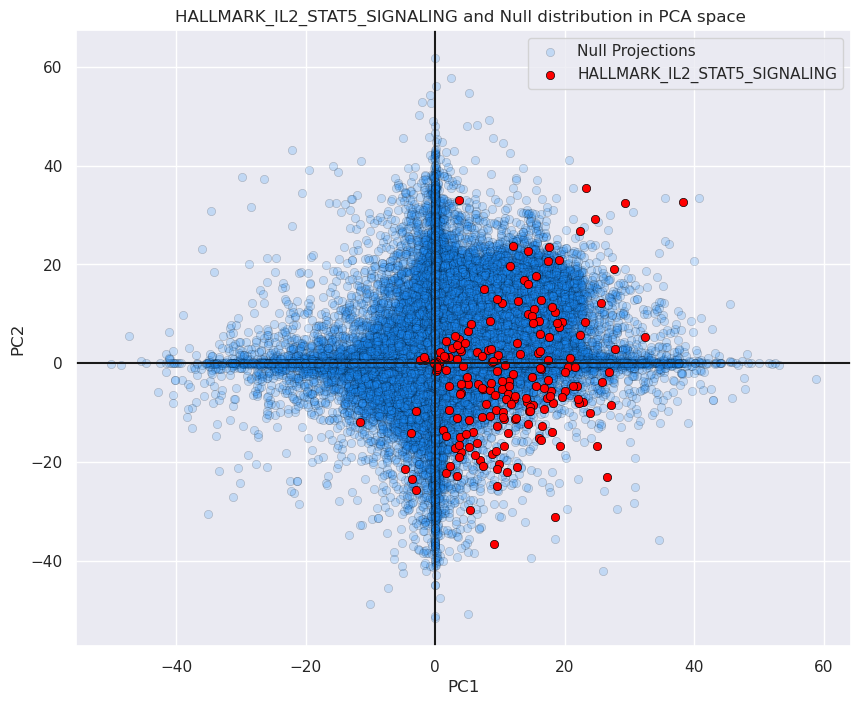

In [ ]:
geneset_name = 'HALLMARK_IL2_STAT5_SIGNALING'

roma.pl.adata = roma.adata

roma.pl.gene_projections(geneset_name)

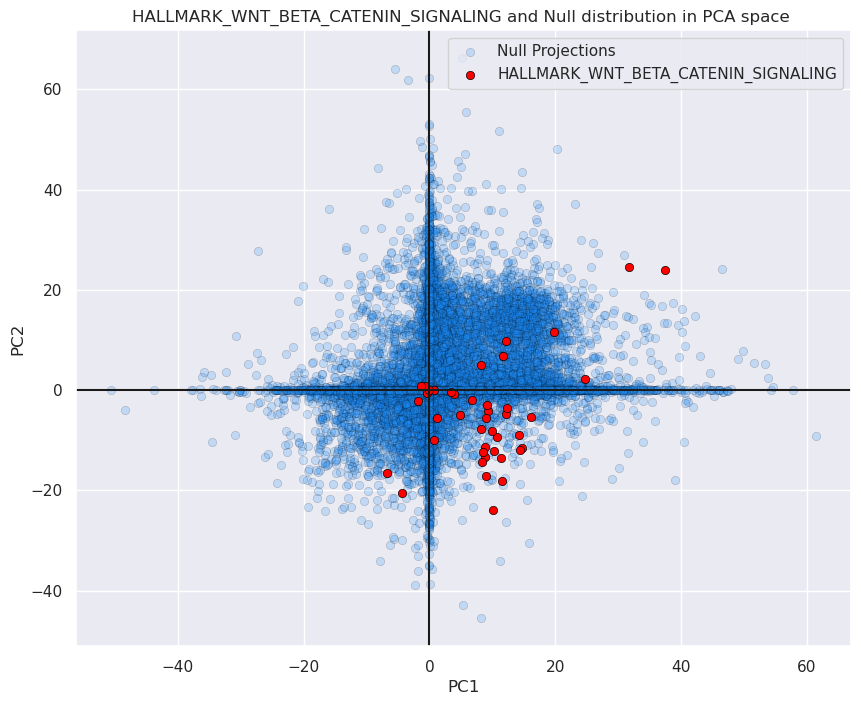

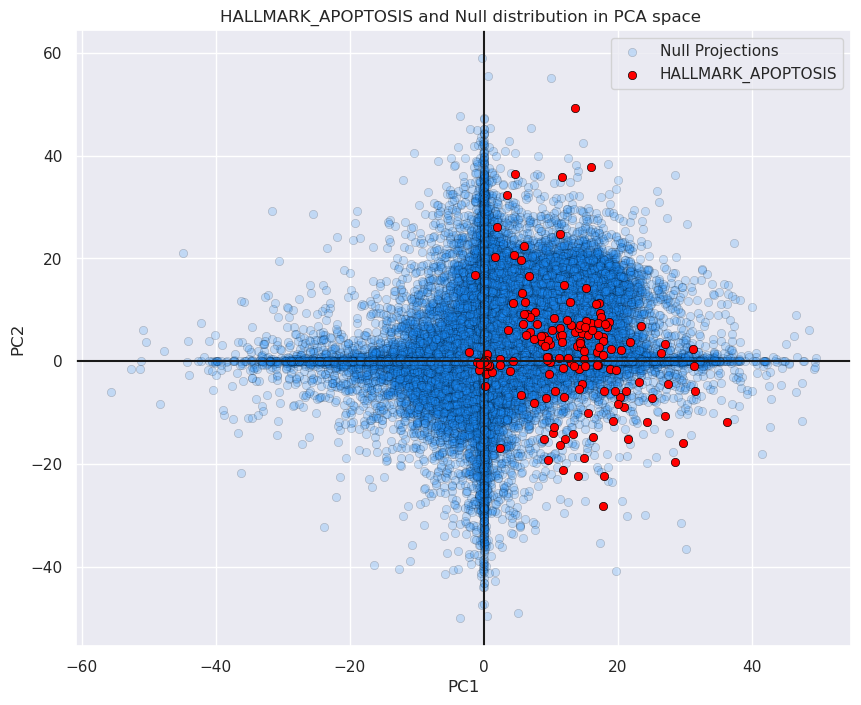

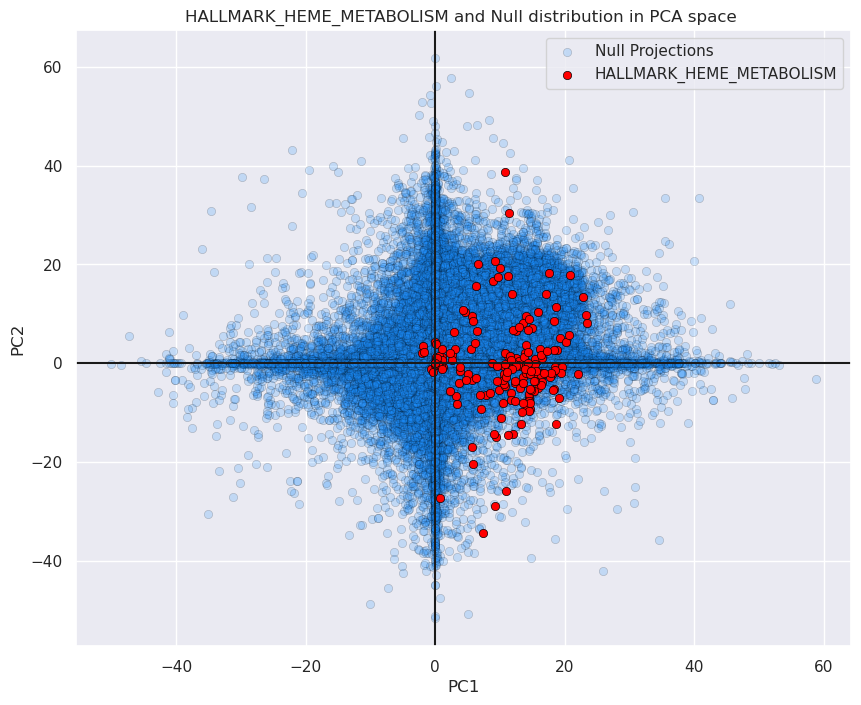

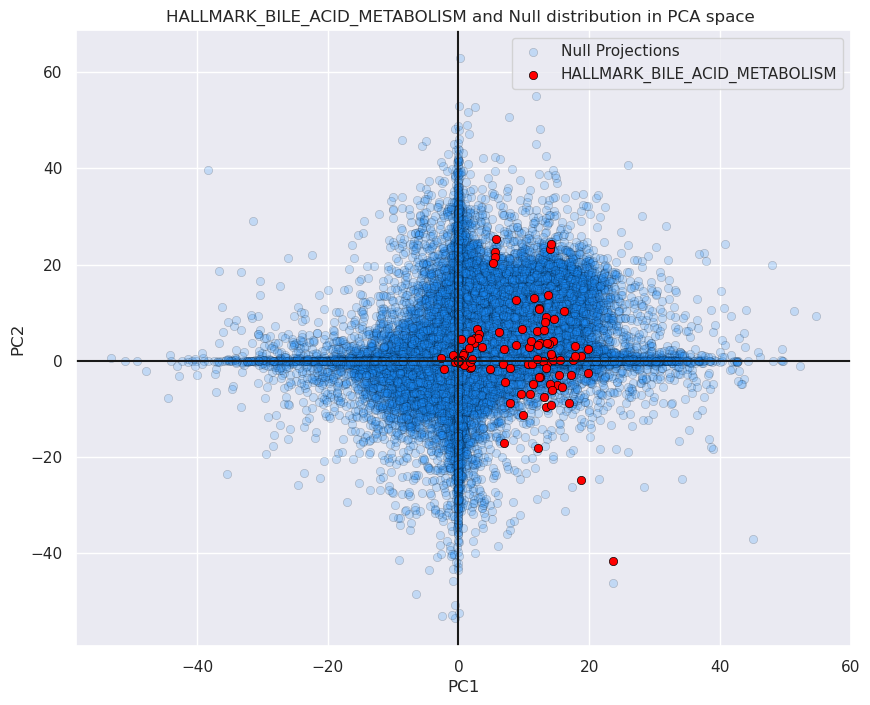

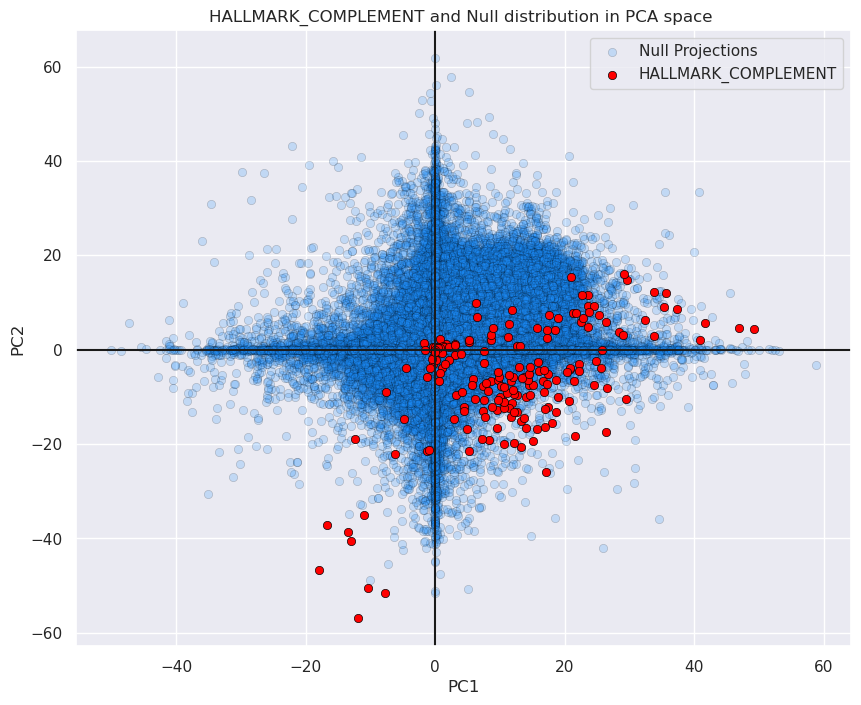

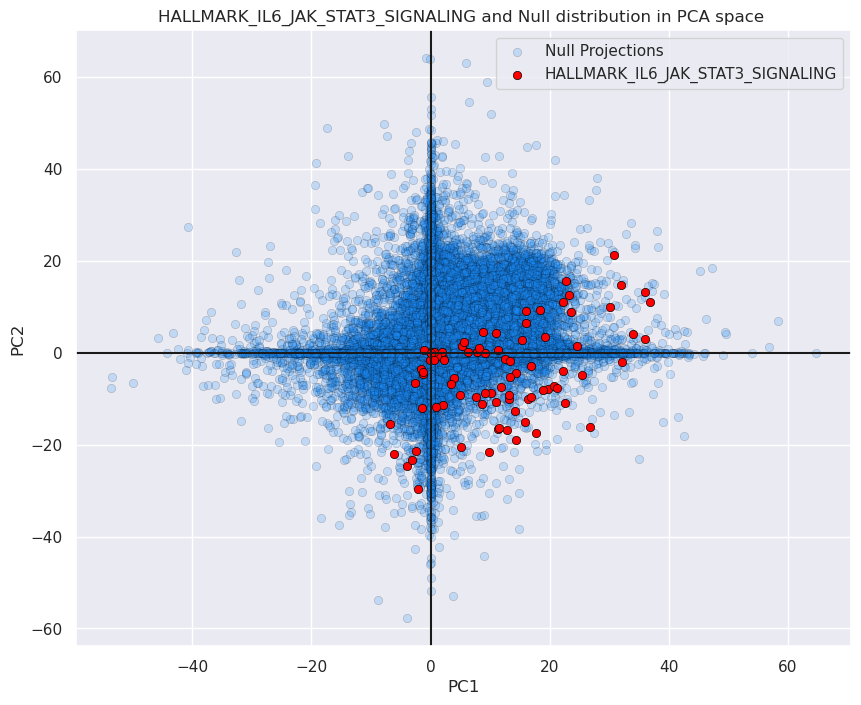

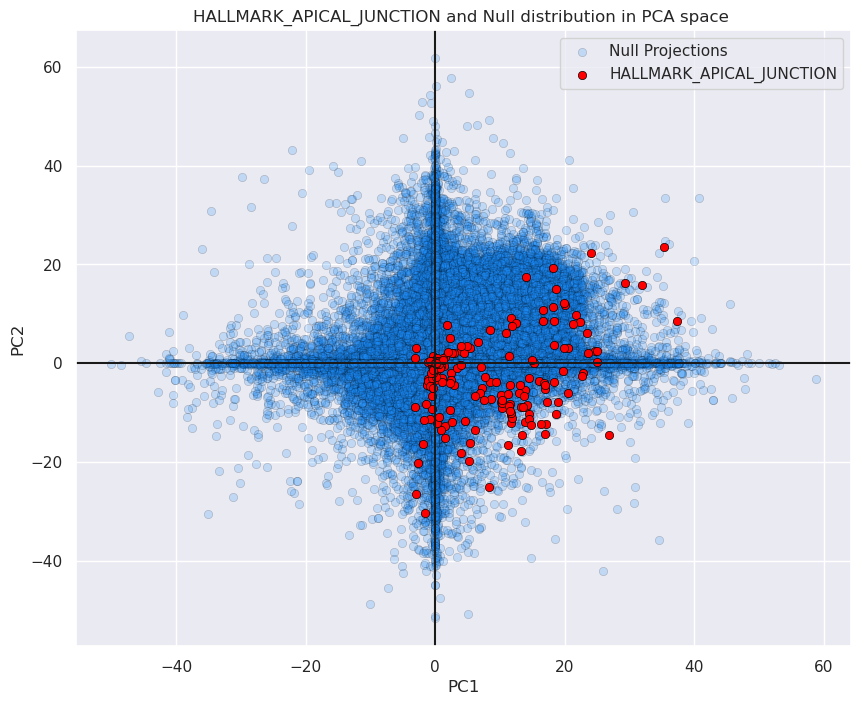

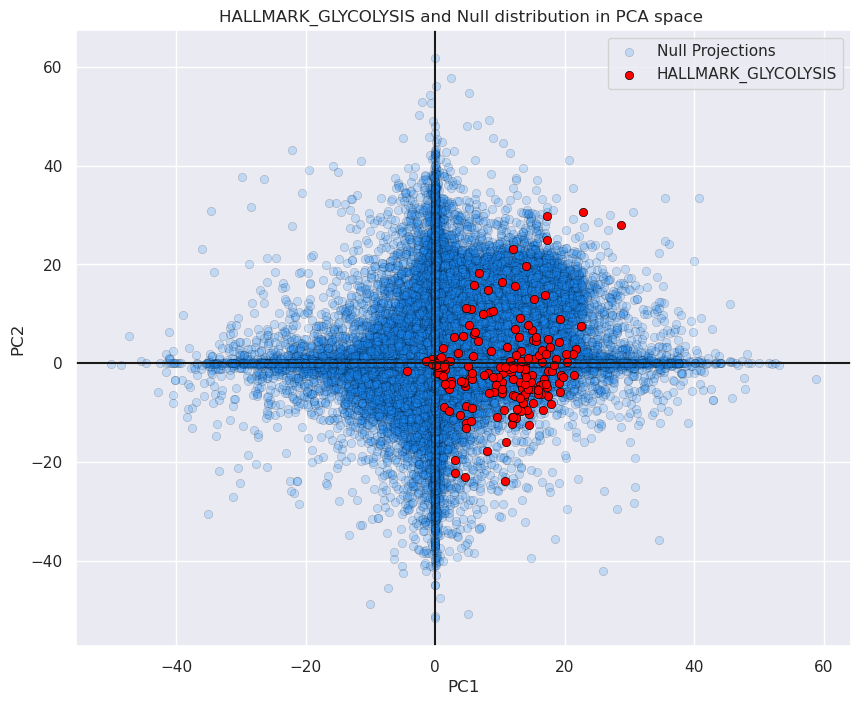

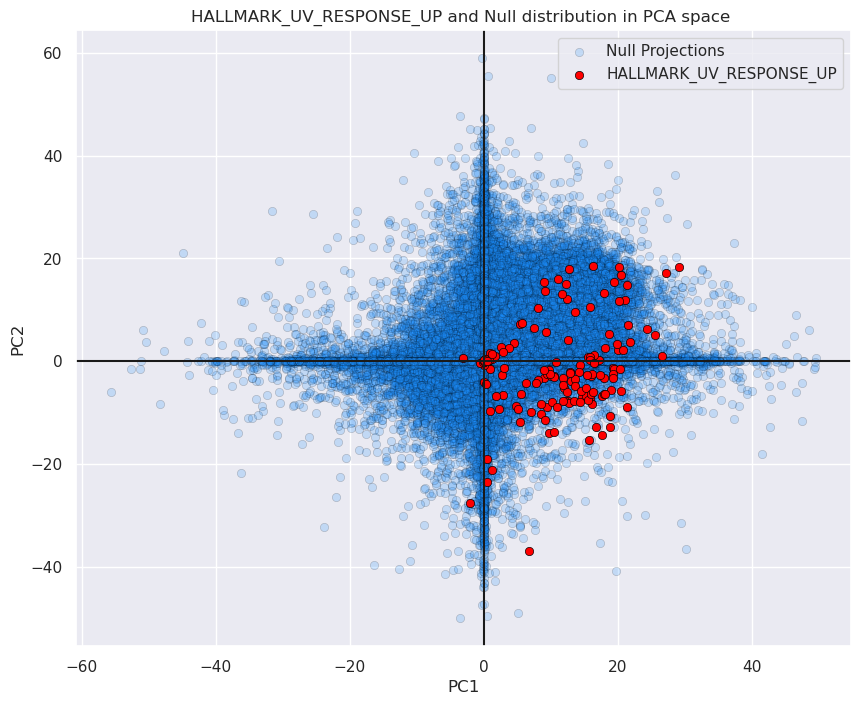

In [ ]:
for geneset_name in difference_df.sort_values(by='L1 R-py', ascending=False).head(10).index.tolist()[1:]:
    roma.pl.gene_projections(geneset_name)

# Conclusion - centering of the subset in SVD is not a good idea 